# Project: Investigate a TMDB movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This data set contains information about 5,000 movies collected from The Movie Database (TMDb).
#### The purpose of this analysis is to answer the following questions
<ol>
    <li>What are the effect of these factors on the revenue?</li>
        <ul>
            <li>Does recruiting more crew members have any effect on the outcoming revenue?</li>
            <li>Does having more budget result in more revenue?</li>
            <li>Which 5 years have achieved the largest revenue?</li>
        </ul>
    <br/>
    <li>What are the effect of these factors on movie rating?</li>
        <ul>
            <li>Does having more cast members affect the rating?</li>
            <li>Does the movie runtime affect the rating?</li>
            <li>Which original language has higher movie rate?</li>
        </ul>
</ol>

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### First we load the data from the associated two files and merge them 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_credits = pd.read_csv('tmdb_5000_credits.csv')
df_movies = pd.read_csv('tmdb_5000_movies.csv')
df = df_credits.merge(df_movies, left_on='movie_id', right_on='id')

## Print first 5 rows

In [3]:
print(df.head())

   movie_id                                   title_x  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  245000000   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...

### Print dataframe general info

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   id                    4803 non-null   int64  
 8   keywords              4803 non-null   object 
 9   original_language     4803 non-null   object 
 10  original_title        4803 non-null   object 
 11  overview              4800 non-null   object 
 12  popularity            4803 non-null   float64
 13  production_companies  4803 non-null   object 
 14  production_countries  4803 non-null   object 
 15  release_date         

### Print Column Count

In [5]:
print(df.count())

movie_id                4803
title_x                 4803
cast                    4803
crew                    4803
budget                  4803
genres                  4803
homepage                1712
id                      4803
keywords                4803
original_language       4803
original_title          4803
overview                4800
popularity              4803
production_companies    4803
production_countries    4803
release_date            4802
revenue                 4803
runtime                 4801
spoken_languages        4803
status                  4803
tagline                 3959
title_y                 4803
vote_average            4803
vote_count              4803
dtype: int64


### Print column data type

In [6]:
df.dtypes

movie_id                  int64
title_x                  object
cast                     object
crew                     object
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_y                  object
vote_average            float64
vote_count                int64
dtype: object

### General Properties

In [7]:
df.describe()

,movie_id,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Data Cleaning

1- We see that we have duplicate columns "id and movie_id", "title_x, title_y", so we need to drop one of each duplicate columns

2- There are some columns that have missing values, luckily we are not intresting in any of these columns except for the runtime and release date column.
The runtime column have 1 missing value, we will replace it with the mean runtime value 
The release date column have 1 missing value. we will drop it.

3- The crew column is very complicated, we only need to know how many members are there. same for cast.

4- release_date column which is a string should be converted into datetime so we can perform our analysis.

5- There is no need to store all these columns, we shall focus on the important columns needed for our analysis.

### 1- Drop Repeated Columns

#### title_x and title_y are repeated columns, we need to drop one column and rename the other coumn to title, aslo id and movie_id are repeated, so we need to keep only id column

In [8]:
df.drop(columns=['title_y', 'id'], inplace=True)
df.rename(columns={"title_x":'title', 'movie_id':'id'}, inplace=True)
df.count()

id                      4803
title                   4803
cast                    4803
crew                    4803
budget                  4803
genres                  4803
homepage                1712
keywords                4803
original_language       4803
original_title          4803
overview                4800
popularity              4803
production_companies    4803
production_countries    4803
release_date            4802
revenue                 4803
runtime                 4801
spoken_languages        4803
status                  4803
tagline                 3959
vote_average            4803
vote_count              4803
dtype: int64

## 2- Fill Missing Values

### Filling the missing value in runtime column with the mean runtime column and drop the misisng row in release_date column 

In [9]:
df['runtime'].fillna((df['runtime'].mean()), inplace=True)
df.dropna(subset=['release_date'], inplace=True)

## 3- Extracting how many crew memeber are there from the crew column

In [10]:
df['crew_number'] = df.apply(lambda row: len(row.crew), axis=1)
df['cast_number'] = df.apply(lambda row: len(row.cast), axis=1)

### We need to convert release_date into datetime to perform our analysis

In [11]:
# https://kanoki.org/2020/05/26/dataframe-groupby-date-and-time/
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

## 4- Selecting only the interesting columns for our research

In [12]:
df = df[['title', 'budget', 'release_date', 'revenue', 'runtime', 'vote_average', 'original_language', 'crew_number', 'cast_number']]
df.columns

Index(['title', 'budget', 'release_date', 'revenue', 'runtime', 'vote_average',
       'original_language', 'crew_number', 'cast_number'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

## Research Question 1 "What factors affect movie revenue?"

### "Does recruiting more crew members have any effect on the outcoming revenue?"

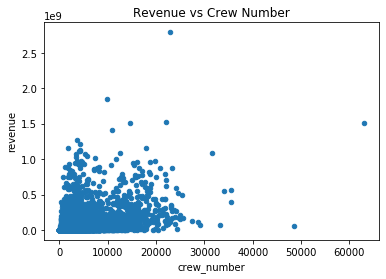

In [13]:
df.plot(x='crew_number',y='revenue', kind='scatter', title="Revenue vs Crew Number");

### Maybe the outliers make it more difficult to decide, we can calcualte the R number or maybe reduce our dataset to only include movies whose crew_number < 30000 and revenue < 1e9

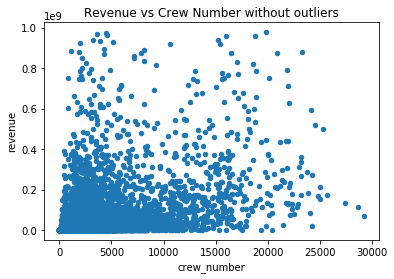

In [14]:
df1 = df.query('crew_number < 30000 and revenue < 1E9')
df1.plot(x='crew_number',y='revenue', kind='scatter', title="Revenue vs Crew Number without outliers")

## The scatter plot make a shape like box shape, There is no correlation between crew_number and revenue

## Ans1: Recruiting more crew members has no effect on the outcoming revenue

### "Does having more budget result in more revenue?"

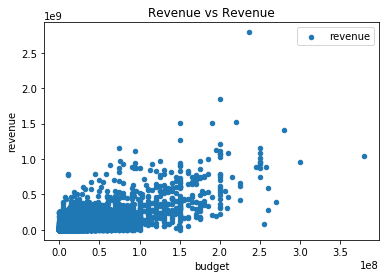

In [15]:
df.plot(kind='scatter', x='budget', y='revenue', title='Revenue vs Revenue', label='revenue')

### Again maybe we need to eliminate outliers

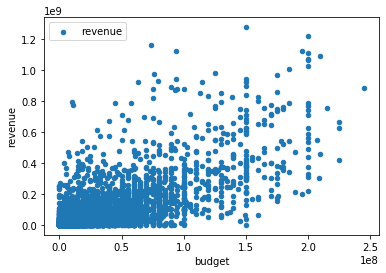

In [16]:
df2 = df.query('budget < 2.5E8 and revenue < 1.3E9')
df2.plot(kind='scatter', x='budget', y='revenue', label='revenue')

### Ans2: It seems that there is a correlation between budget and revenue

## Let's compute the correlation coefficient to check our results

In [17]:
df2.corr()
### maybe histogram plot will give us clearer visual representation
# df.groupby('budget').revenue.hist(bins=20)

,budget,revenue,runtime,vote_average,crew_number,cast_number
budget,1.000000,0.717382,0.245893,0.083672,0.443660,0.314959
revenue,0.717382,1.000000,0.226430,0.198761,0.389038,0.357206
runtime,0.245893,0.226430,1.000000,0.369237,0.209541,0.297243
vote_average,0.083672,0.198761,0.369237,1.000000,0.166625,0.228815
crew_number,0.443660,0.389038,0.209541,0.166625,1.000000,0.340861
cast_number,0.314959,0.357206,0.297243,0.228815,0.340861,1.000000


## As we have concluded,
## There is a weak correlation between revenue and crew_number while there is a moderate correlation between budget and revenue

### Now we will see which 5 years produced movies that achieved more revenue 

[Text(0, 0.5, 'revenue'), Text(0.5, 0, 'year')]

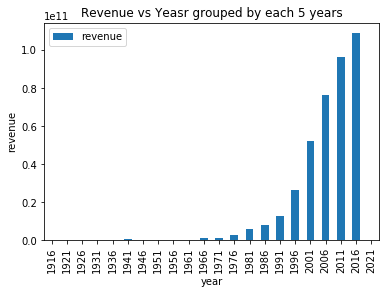

In [18]:
df_groupedby_date = df.groupby(pd.Grouper(key='release_date',freq='5Y')).sum().reset_index()
df_groupedby_date['year'] = pd.DatetimeIndex(df_groupedby_date['release_date']).year
ax = df_groupedby_date.plot(kind='bar', x='year', y='revenue', title="Revenue vs Yeasr grouped by each 5 years")
ax.set(xlabel="year", ylabel="revenue")

### Ans3: The revenue is monotonically increasing, The largest 5 year revenue is from 2016-2021

## It seems that the more recent is the movie and the more budget is available, the more revenue it gains 

# Now let's consider what factors affect the movie rating

## Research Question 2 "What are the effect of these factors on movie rating?"

### Does having more cast members affect the rating?

,budget,revenue,runtime,vote_average,crew_number,cast_number
budget,1.000000,0.730806,0.269774,0.092644,0.451584,0.340859
revenue,0.730806,1.000000,0.251174,0.197153,0.414431,0.383391
runtime,0.269774,0.251174,1.000000,0.370834,0.218641,0.309213
vote_average,0.092644,0.197153,0.370834,1.000000,0.169113,0.229704
crew_number,0.451584,0.414431,0.218641,0.169113,1.000000,0.350708
cast_number,0.340859,0.383391,0.309213,0.229704,0.350708,1.000000


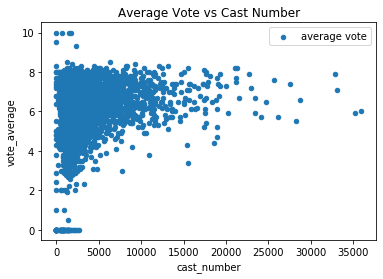

In [19]:
df.plot(kind='scatter', x='cast_number', y='vote_average', label="average vote", title='Average Vote vs Cast Number')
df.corr()

### Ans1: The cast number has weak correlation with the movie rate

### Does the movie runtime affect the rating?

In [20]:
# https://stackoverflow.com/questions/21441259/pandas-groupby-range-of-values
df_groubedby_vote = df.groupby(pd.cut(df["vote_average"], bins=10)).mean()
df_groubedby_vote

,budget,revenue,runtime,vote_average,crew_number,cast_number
vote_average,,,,,,
"(-0.01, 1.0]",1.254847e+05,2.128923e+02,76.967321,0.038462,551.046154,796.938462
"(1.0, 2.0]",7.143043e+04,1.301332e+06,77.857143,1.985714,443.714286,941.000000
"(2.0, 3.0]",1.168929e+07,1.595053e+06,85.964286,2.828571,787.964286,1710.357143
"(3.0, 4.0]",1.234006e+07,6.911541e+06,94.785714,3.626190,1516.964286,2213.476190
"(4.0, 5.0]",1.934190e+07,2.378055e+07,93.939394,4.672960,2822.923077,2280.025641
"(5.0, 6.0]",3.231714e+07,6.593754e+07,102.034892,5.640893,3828.460572,3088.498953
"(6.0, 7.0]",3.057491e+07,9.101586e+07,109.900873,6.533693,4031.985105,3414.236261
"(7.0, 8.0]",3.004337e+07,1.366983e+08,119.031457,7.420026,5255.557312,4704.952569
"(8.0, 9.0]",2.705470e+07,2.002424e+08,140.068182,8.197727,6055.750000,6250.909091


[Text(0, 0.5, 'runtime')]

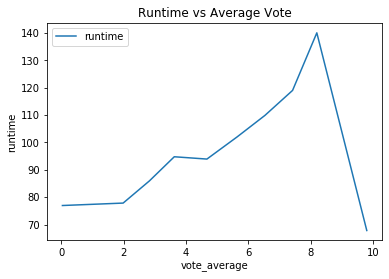

In [21]:
ax = df_groubedby_vote.plot(x='vote_average', y='runtime', kind='line', title='Runtime vs Average Vote')
ax.set(ylabel='runtime')

### Ans2: In general, The more the runtime is, the more the average_rate is. However, the movies with rates between 9 to 10 has the shortest runtime at all.

### Which original language has higher movie rate?

In [22]:
df_groubedby_lang = df.groupby('original_language').mean()
df_groubedby_lang.sort_values('vote_average', ascending=False).head()

,budget,revenue,runtime,vote_average,crew_number,cast_number
original_language,,,,,,
te,4.000000e+07,1.000000e+08,159.00,7.500,4132.000000,2369.000000
id,1.050000e+06,2.274881e+06,108.00,7.400,3615.000000,1742.000000
he,6.666667e+05,3.708616e+06,108.00,7.400,831.333333,1261.333333
fa,2.450000e+05,2.250000e+05,102.25,7.375,728.000000,1073.750000
ar,0.000000e+00,0.000000e+00,92.00,7.300,1841.500000,1300.000000


http://www.lingoes.net/en/translator/langcode.htm
### The most langauge with high rate is Telugu.
#### Then, Indonesian, Hebrew, Farsi, Arabic

<a id='conclusions'></a>
## Limitaions

Here are some limitation for this analysis:
<ul>
    <li>There are afew missing values, we used different ways to deal with missing values such as replacing with the mean or drop the record</li>
    <li>There are not enough data about older movies, more recent movies have larger data, this could result in a biased analysis</li>
    <li>Some older years have not any movies at all</li>
    <li>The dataset is relatively small, only 5k record. We may need more data to increase our confidence interval</li>
</ul>

## Conclusions

We have investigated the effect of some factors over the revenue and movie rate and concluded that:

The crew number doesn't affect the revenue, while providing more budget will more likely results in higher revenue.

Recent movies has more likelihood to acvieve more revenue.


As for the movie rate,
The cast number doesn't affect the movie rate, while longer runtime movies have more liklihood to gain higher rate. except for the some short movies that gained rate from 9 to 10.

The first 5 languages that gained higher movie rates are:
Telugu, Indonesian, Hebrew, Farsi, Arabic

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_TMDB_Dataset.ipynb'])

0